In [1]:
import pandas as pd

In [2]:
from visualization.utils.qa_helpers import compare_metrics, plot_cls_P_R, interactive_3d_distributions

### Paths preparation

In [3]:
## Paths
project_path = '/home/arazin/main/work/HUAWEI/SRC/SRC_from_remote/SRC_QC4QA'

############################# Classified domains #############################

# Data_Science_and_Machine_Learning_class domain QA generation
ds_adapter = '/data/inference/qa/Data_Science_and_Machine_Learning_class/test-256-0.8point-264_LoRa.csv'
ds_pretrain = '/data/inference/qa/Data_Science_and_Machine_Learning_class/test-256-0.9.csv'

# Database_and_SQL_class domain QA generation
sql_adapter = '/data/inference/qa/Database_and_SQL_class/test-256-0.8point-117_LoRa.csv'
sql_pretrain = '/data/inference/qa/Database_and_SQL_class/test-256-0.9.csv'

# GUI_Desktop_Applications_class domain QA generation
app_adapter = '/data/inference/qa/GUI_Desktop_Applications_class/test-256-0.8point-285_LoRa.csv'
app_pretrain = '/data/inference/qa/GUI_Desktop_Applications_class/test-256-0.9.csv'

# Networking_and_APIs_class domain QA generation
net_adapter = '/data/inference/qa/Networking_and_APIs_class/test-256-0.8point-152_LoRa.csv'
net_pretrain = '/data/inference/qa/Networking_and_APIs_class/test-256-0.9.csv'

# Other_class domain QA generation
other_adapter = '/data/inference/qa/Other_class/test-256-0.8point-612_LoRa.csv'
other_pretrain = '/data/inference/qa/Other_class/test-256-0.9.csv'

# System_Administration_and_DevOps_class domain QA generation
sys_adapter = '/data/inference/qa/System_Administration_and_DevOps_class/test-256-0.8point-246_LoRa.csv'
sys_pretrain = '/data/inference/qa/System_Administration_and_DevOps_class/test-256-0.9.csv' 

# Web_Development_class domain QA generation
web_adapter = '/data/inference/qa/Web_Development_class/test-256-0.9point-220_LoRa.csv'
web_pretrain = '/data/inference/qa/Web_Development_class/test-256-0.9.csv'

############################# Classified sentiment #############################

# API_USAGE_class domain QA generation
api_usage_adapter = '/data/inference/qa/API_USAGE_class/test-256-0.9point-528_LoRa.csv'
api_usage_pretrain = '/data/inference/qa/API_USAGE_class/test-256-0.9.csv'

############################# Summarization inference #############################
ds_description = '/data/inference/summarization/qa_inference_on_descripted_questions_ds_domain.csv'
ds_no_description = '/data/inference/summarization/qa_inference_on_base_questions_ds_domain.csv'

In [4]:
dfs_adapter = [
    pd.read_csv(project_path + name) for name in [
        ds_adapter, 
        sql_adapter, 
        app_adapter, 
        net_adapter, 
        other_adapter, 
        sys_adapter, 
        web_adapter, 
        api_usage_adapter
        ]
    ]

dfs_pretrain = [
    pd.read_csv(project_path + name) for name in [
        ds_pretrain, 
        sql_pretrain, 
        app_pretrain, 
        net_pretrain, 
        other_pretrain, 
        sys_pretrain, 
        web_pretrain, 
        api_usage_pretrain
        ]
    ]

ds_description = pd.read_csv(project_path + ds_description)
ds_no_description = pd.read_csv(project_path + ds_no_description)

### NLP metrics comparison between Lora adapter and base LLM on several domains

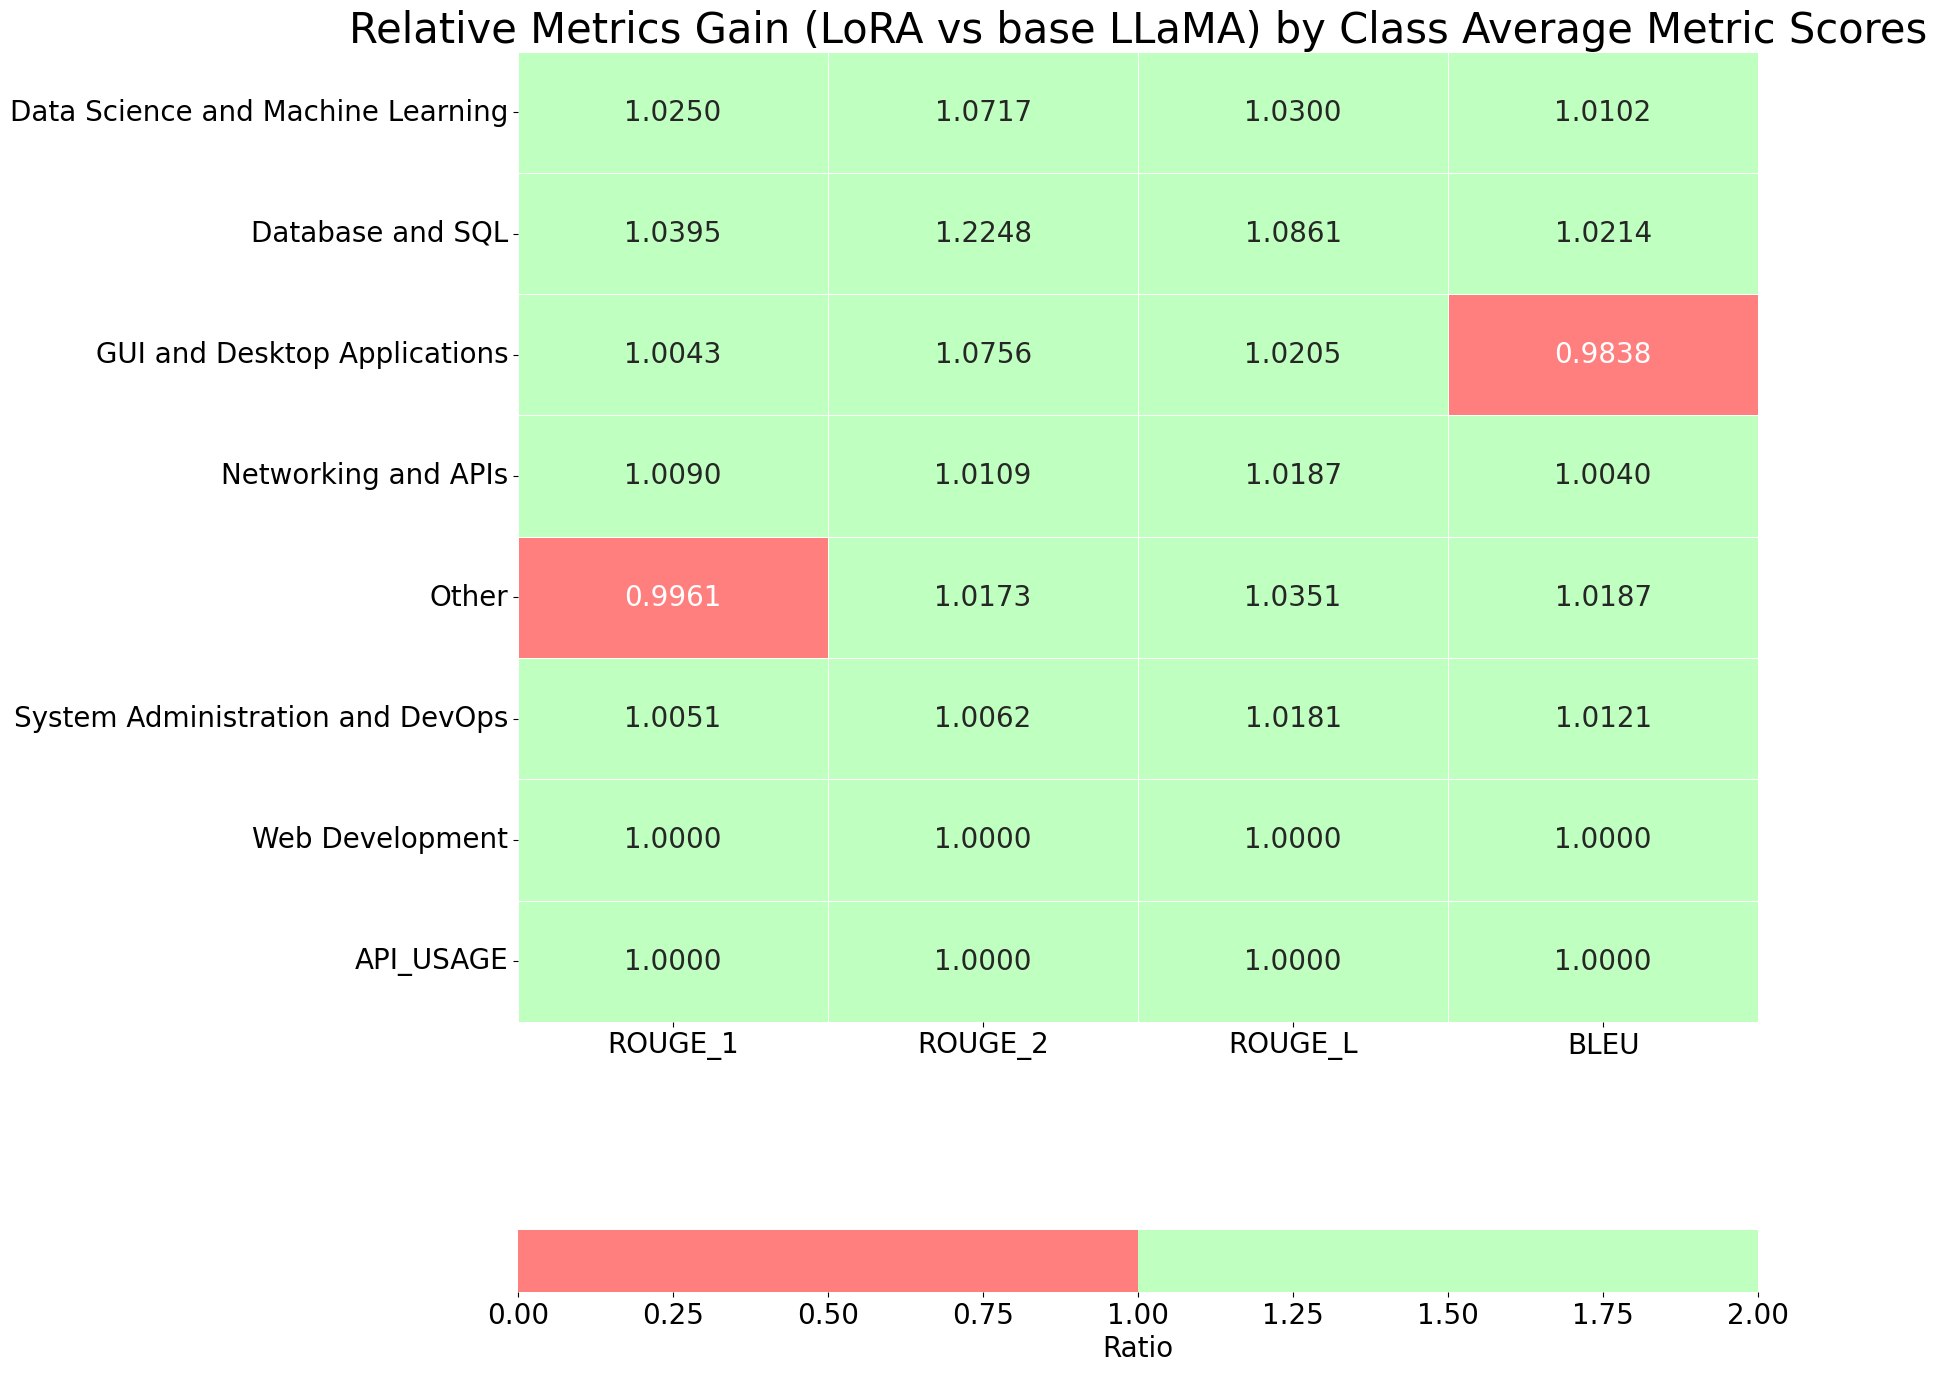

In [5]:
compare_metrics(dfs_adapter, dfs_pretrain)

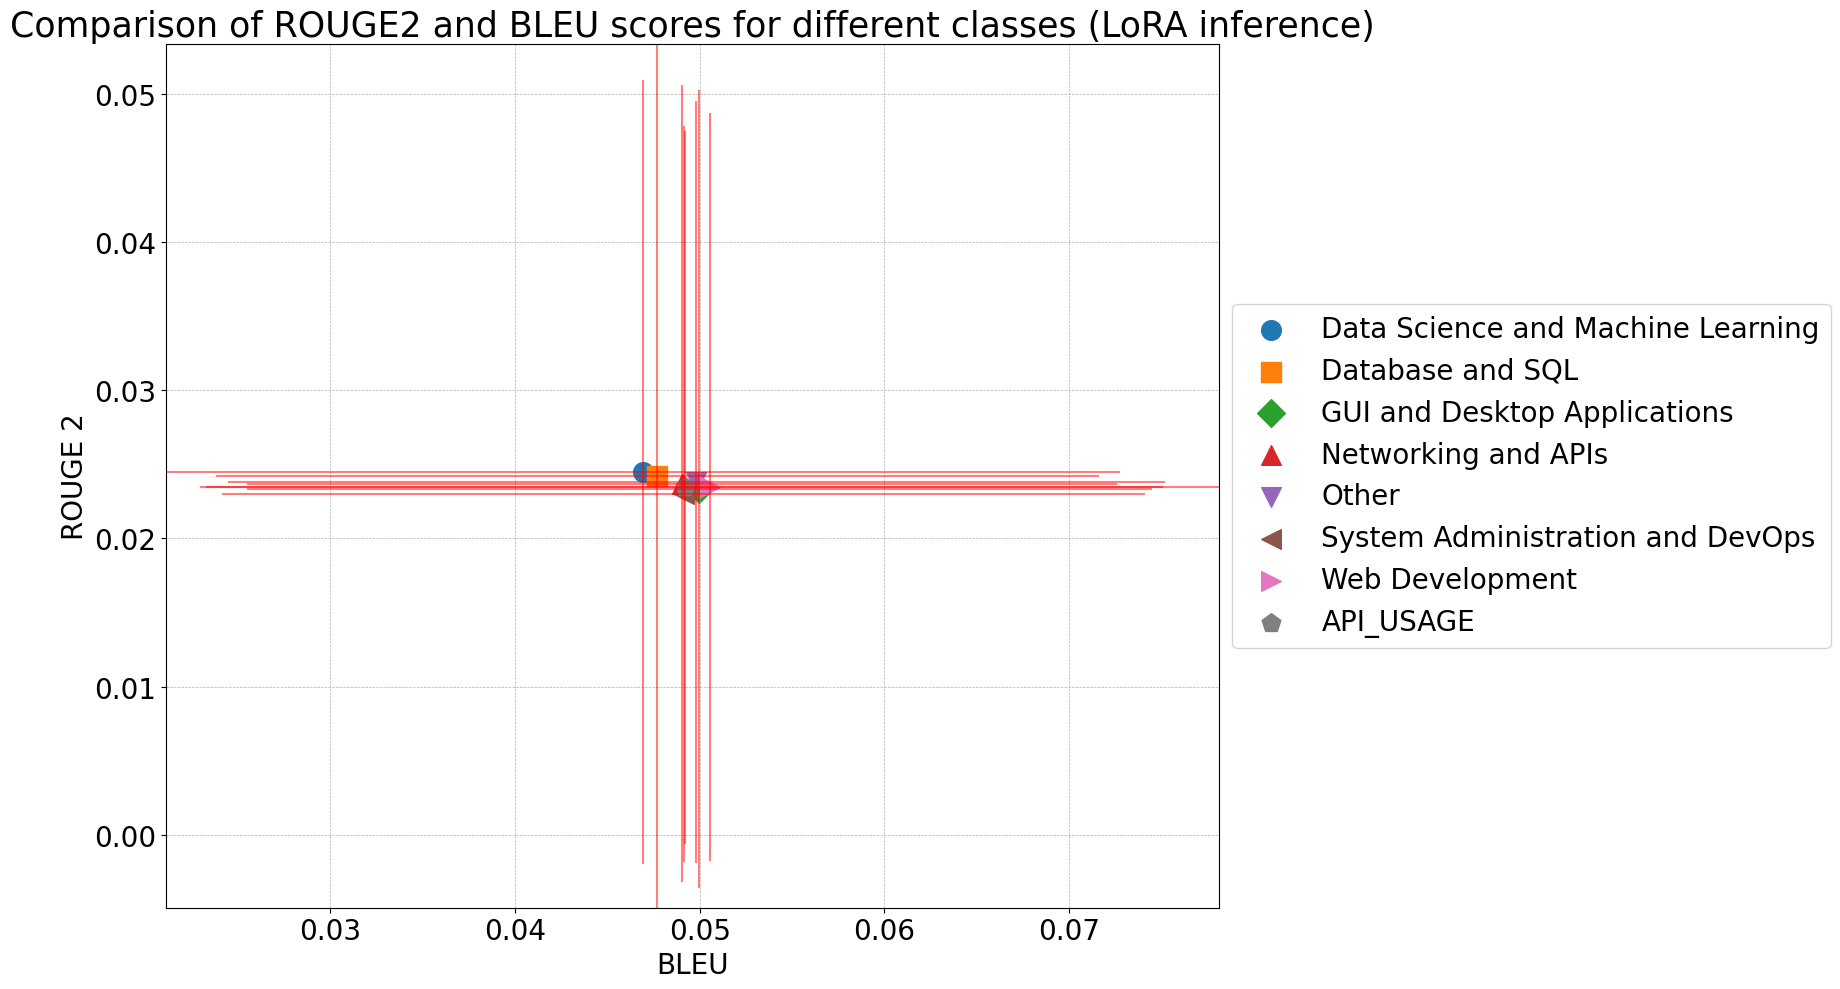

In [6]:
plot_cls_P_R(dfs_adapter)

In [8]:
interactive_3d_distributions(dfs_adapter, 'BLEU')

### Code summarization influence on generated answers analysis

In [23]:
ds_no_description = ds_no_description.rename(columns={'Generated Answer': 'Generated Answer_no_d'})

In [24]:
combined = pd.merge(ds_description, ds_no_description[['Generated Answer_no_d', 'Title']], on='Title',)
questions = iter(combined['Question'].values)
answers = iter(combined['Answer'].values)

description_ans = iter(combined['Generated Answer'].values)
no_description_ans = iter(combined['Generated Answer_no_d'].values)

In [42]:
print('Question')
print('-'*100)
print(next(questions))
print(' ')

print('Answer')
print('-'*100)
print(next(answers))
print(' ')

print('Description')
print('-'*100)
print(next(description_ans))
print(' ')

print('NO description')
print('-'*100)
print(next(no_description_ans))
print(' ')

Question
----------------------------------------------------------------------------------------------------
<p>I'm trying to perform a linear regression using k-fold validation, in the sunspost dataset.
In this exercise I need to take the last 10 years as test and use the rest for tranning, further I should measure the model accuracy using RMSE.
Also, I need to test k-values from 1 to 24 in order to identify the better k value (lower RMSE)
However, Im obtaining very strange RMSE values for k (ranging from -6 to -1) while it should stay closer to 16 I think, considering that sunspot values are not normalized.
(PS: For the following script I've generated the day_count column imagining that the regression model does not accept date values.)</p>

<pre><code>from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas

### QA examples

In [91]:
df = dfs_adapter[0].sample(100)
questions = iter(df['Question'].values)
answers = iter(df['Answer'].values)

generated = iter(df['Generated Answer'].values)

In [192]:
print('Question')
print('-'*100)
print(next(questions))
print(' ')

print('Answer')
print('-'*100)
print(next(answers))

print(' ')

print('Generated Answer')
print('-'*100)
print(next(generated))
print(' ')

Question
----------------------------------------------------------------------------------------------------


StopIteration: 